In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
from landlab import load_params
from landlab.components.submarine_diffusion.sequence_model import SequenceModel

In [3]:
params = load_params('params.yaml')
pprint(params)

{'clock': {'start': -20000.0, 'step': 100.0, 'stop': 5000.0},
 'flexure': {'method': 'airy', 'rho_mantle': 3300.0},
 'grid': {'bc': {'bottom': 'closed', 'top': 'closed'},
          'origin': 0.0,
          'shape': [3, 100],
          'spacing': 100.0},
 'sea_level': {'amplitude': 10.0, 'phase': 0.0, 'wave_length': 1000.0},
 'submarine_diffusion': {'alpha': 0.0005,
                         'ksh': 100.0,
                         'load': 3.0,
                         'shelf_depth': 15.0,
                         'shelf_slope': 0.001,
                         'wave_base': 60.0},
 'subsidence': {'filepath': 'subsidence.csv'}}


In [4]:
sequence = SequenceModel(**params)

In [5]:
sequence.run()

In [6]:
layers_z = (sequence.grid.layers.z +
            sequence.grid.at_node['bedrock_surface__elevation'][sequence.grid.node_at_cell])

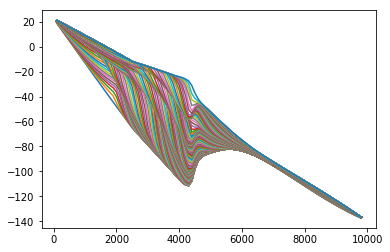

In [7]:
_ = plt.plot(sequence.grid.x_of_node[sequence.grid.core_nodes], layers_z.T)